### Homework Rakamin Trial Class - Mini Case

# Mengukur Performa Penjualan Ritel Online

## Load Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/online_retail_II.csv')

In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
df[df['InvoiceDate'].str.contains('2010')]

In [ ]:
invoice_cancel = df[df['Invoice'].str.contains('C')]
print(invoice_cancel)

         Invoice StockCode                       Description  Quantity  \
178      C489449     22087          PAPER BUNTING WHITE LACE       -12   
179      C489449    85206A      CREAM FELT EASTER EGG BASKET        -6   
180      C489449     21895     POTTING SHED SOW 'N' GROW SET        -4   
181      C489449     21896                POTTING SHED TWINE        -6   
182      C489449     22083        PAPER CHAIN KIT RETRO SPOT       -12   
...          ...       ...                               ...       ...   
1065910  C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
1067002  C581499         M                            Manual        -1   
1067176  C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
1067177  C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
1067178  C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

                 InvoiceDate   Price  Customer ID         Country  
178      2009-12-01 10:33:00    2.95      1

In [ ]:
jumlah_data = invoice_cancel.shape
print(jumlah_data)

(19494, 8)


In [ ]:
df.shape

(1067371, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [ ]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

## Section 1

### Create New Feature: Year

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year

In [ ]:
df['Year'] = df['Year'].fillna(0).astype(int)

In [ ]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France,2011


### Filtering Data

In [ ]:
sales = df[ (df['Quantity']>0) & (~df['Invoice'].str.startswith('C')) ]

### Create New Feature: Revenue

In [ ]:
sales_copy = sales.copy()
sales_copy.loc[:, 'Revenue'] = sales_copy['Quantity'] * sales_copy['Price']


In [ ]:
sales_copy.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.0


### Average of Revenue per Year

In [ ]:
revenue_per_year = sales_copy.groupby('Year')['Revenue'].mean()
revenue_per_year

Year
2009    18.713273
2010    19.908987
2011    20.058767
Name: Revenue, dtype: float64

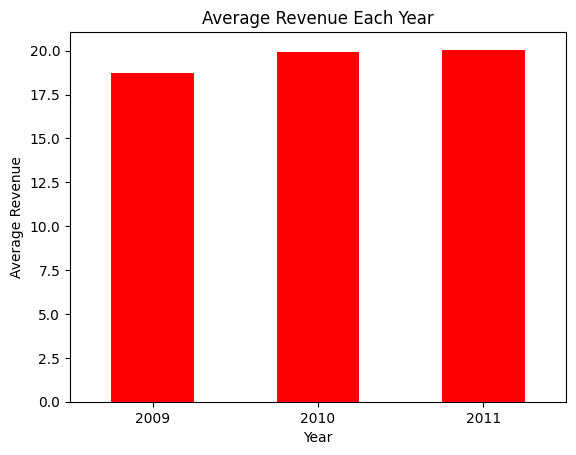

In [ ]:
import matplotlib.pyplot as plt
revenue_per_year.plot(kind='bar',
                      xlabel='Year',
                      color = 'red',
                      ylabel='Average Revenue',
                      title='Average Revenue Each Year')
plt.xticks(rotation=0)
plt.show()

### Interpretation

---
Rata-rata pendapatan perusahaan yang terjadi di tahun 2009-2011 menunjukkan bahwa setiap tahunnya rata-rata pendapatan selalu naik dibandingkan tahun sebelumnya. Dapat dilihat dari visualisasi data di atas bahwa tahun 2011 merupakan tahun yang memiliki paling tinggi rata-rata pendapatannya dibandingkan tahun sebelumnya 2010 dan 2009. Begitupun dengan rata-rata pendapatan 2010 yang juga lebih tinggi dari tahun 2009.


Hal ini membuktikan bahwa performa penjualan perusahaan ritel online dalam kurun waktu 3 tahun terakhir memiliki performa yang baik karena menunjukkan peningkatan yang baik setiap tahunnya.


## Section 2

### Filtering Data

#### Customers who finished their purchases

In [ ]:
finished = sales_copy[sales_copy['Customer ID'].notnull()]

#### Customers who canceled their purchases

In [ ]:
cancel = df[df['Invoice'].str.contains('C')]

### Number of Finished and Canceled Transactions Each Year

In [ ]:
transaction_finished = finished.groupby('Year')['Invoice'].count()

In [ ]:
transaction_cancelled = cancel.groupby('Year')['Invoice'].count()

In [ ]:
print('Jumlah transaksi yang berhasil adalah : \n', transaction_finished, '\n')
print('Jumlah transaksi yang dibatalkan adalah : \n', transaction_cancelled)

Jumlah transaksi yang berhasil adalah : 
 Year
2009     30761
2010    403094
2011    371765
Name: Invoice, dtype: int64 

Jumlah transaksi yang dibatalkan adalah : 
 Year
2009    1015
2010    9919
2011    8560
Name: Invoice, dtype: int64


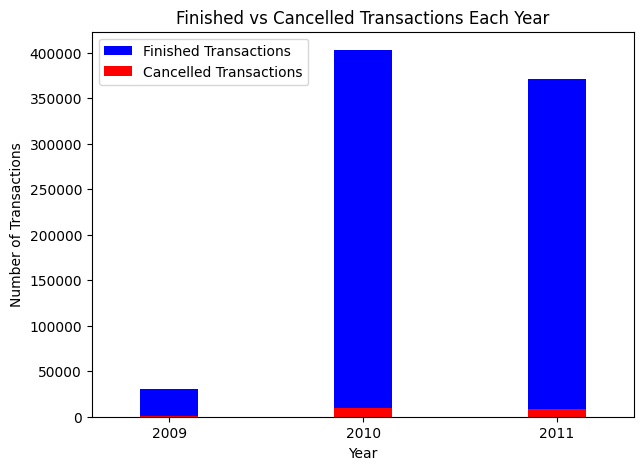

In [ ]:
plt.figure(figsize=(7, 5))
transaction_finished.plot(kind='bar', color='blue', label='Finished Transactions', width=0.3)
transaction_cancelled.plot(kind='bar', color='red', label='Cancelled Transactions', width=0.3)
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.title('Finished vs Cancelled Transactions Each Year')
plt.legend()
plt.xticks(rotation=0)
plt.show()

Berdasarkan perbandingan jumlah transaksi yang berhasil dan jumlah transaksi yang dibatalkan untuk setiap tahun dalam perusahaan ritel online, dapat diketahui bahwa pada tahun 2010 transaksi penjualan paling banyak terjadi. Kemudian diikuti dengan tahun 2011. Dan transaksi penjualan yang paling sedikit terjadi adalah pada tahun 2009.

Hal ini menunjukkan bahwa terjadi banyak peningkatan pada tahun 2009 ke 2010. Dan terjadi sedikit penurunan transaksi  dari tahun 2010 ke 2011.

Pembatalan transaksi paling sedikit terjadi pada tahun 2009, sedangkan transaksi yang berhasil terjadi paling banyak terjadi pada tahun 2010 dengan peningkatan yang sangat pesat daripada tahun sebelumnya. Sedangkan pada tahun berikutnya yaitu 2011 terjadi sedikit penurunan baik transaksi yang dibatalkan atau transaksi yang berhasil terjadi,


In [ ]:
sales_copy.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.0


### Cancellation Rate

In [ ]:
total_customers_per_year = sales_copy.groupby('Year')['Customer ID'].nunique()
cancellation_rate_per_year = (transaction_cancelled / total_customers_per_year) * 100
print('Jumlah persentase cancellation rate : \n ', cancellation_rate_per_year)

Jumlah persentase cancellation rate : 
  Year
2009    106.282723
2010    234.325537
2011    202.843602
dtype: float64


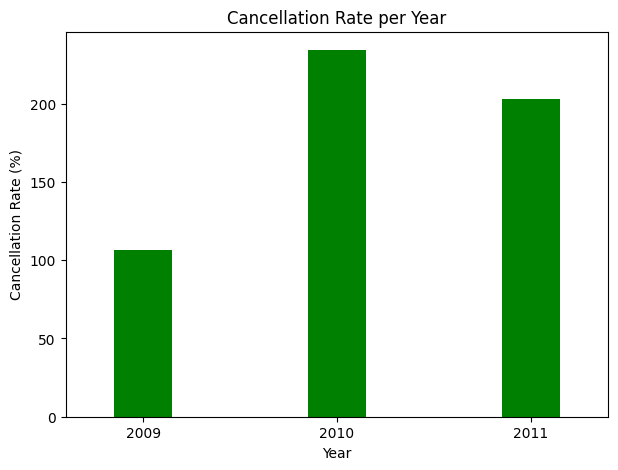

In [ ]:
plt.figure(figsize=(7, 5))
cancellation_rate_per_year.plot(kind='bar', color='green', width=0.3)
plt.xlabel('Year')
plt.ylabel('Cancellation Rate (%)')
plt.title('Cancellation Rate per Year')
plt.xticks(rotation=0)
plt.show()

### Interpretation
---
Berdasarkan perbandingan jumlah transaksi yang berhasil dan jumlah transaksi yang dibatalkan untuk setiap tahun dalam perusahaan ritel online, dapat diketahui bahwa pada tahun 2010 transaksi penjualan paling banyak terjadi. Kemudian diikuti dengan tahun 2011. Dan transaksi penjualan yang paling sedikit terjadi adalah pada tahun 2009.

Hal ini menunjukkan bahwa terjadi banyak peningkatan pada tahun 2009 ke 2010. Dan terjadi sedikit penurunan transaksi  dari tahun 2010 ke 2011.

Pembatalan transaksi paling sedikit terjadi pada tahun 2009, sedangkan transaksi yang berhasil terjadi paling banyak terjadi pada tahun 2010 dengan peningkatan yang sangat pesat daripada tahun sebelumnya. Sedangkan pada tahun berikutnya yaitu 2011 terjadi sedikit penurunan baik transaksi yang dibatalkan atau transaksi yang berhasil terjadi.



Dalam perhitungan rate pembatalan setiap tahunnya dapat diketahui bahwa tahun dengan rate tertinggi terjadi pembatalan transaksi adalah pada tahun 2010, diikuti dengan 2011 dan 2009.

Hal ini menunjukkan hal yang selaras dengan perbandingan jumlah transaksi yang berhasil terjadi. Yang di mana perbandingan jumlah transaksi yang berhasil dengan rate pembatalan transaksi memiliki transaksi yang paling tinggi pada tahun 2010. Kemudian diikuti pada tahun 2011, serta 2009